<a href="https://colab.research.google.com/github/karkos16/SiADproject/blob/main/zadDom_Karol_Kostrubiec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****
**Karol Kostrubiec 151820 i najwiekszy chuj na miescie JJ Julia Jebacz≈ºon**
****

****
# Zbi√≥r danych
**Pochodzenie i opis**

Zbi√≥r danych wykorzystany w mojej pracy mo≈ºna znale≈∫c pod linkiem: https://www.kaggle.com/datasets/ruchi798/drug-overdose-deaths

Przedstawia on ≈õmierci powiƒÖzane z przedawkowaniem narkotyk√≥w w stanie Connecticut w latach 2012 - 2018. Zbi√≥r zawiera ponad 5000 unikalnych danych o zgonie, ka≈ºdy rekord w zbiorze danych opisuje jeden odnotowany zgon. Ka≈ºdy odnotowany zgon zawiera informacje na temat daty zg≈Çoszenia/≈õmierci, wieku, p≈Çci, rasy, miasta, hrabstwa oraz stan zamieszkania osoby zmar≈Çej z powodu przedawkowania narkotyk√≥w. Jednak ja w swojej pracy u≈ºyjƒô tylko dane zwiƒÖzane z datƒÖ ≈õmierci, wiekiem, p≈ÇciƒÖ oraz rasƒÖ.
****

In [1]:
url <- "https://raw.githubusercontent.com/karkos16/SiADproject/main/drug_deaths.csv"
destfile <- "drug_deaths.csv"
download.file(url, destfile)


# Analiza eksploracyjna

In [2]:
library(dplyr)
library(ggplot2)


Attaching package: ‚Äòdplyr‚Äô


The following objects are masked from ‚Äòpackage:stats‚Äô:

    filter, lag


The following objects are masked from ‚Äòpackage:base‚Äô:

    intersect, setdiff, setequal, union




In [53]:
# Wczytanie danych z pliku drug_deaths.csv
data <- read.csv("drug_deaths.csv")
data <- data[complete.cases(data$Age),] #pozbycie siƒô warto≈õci nieokre≈õlonych
data <- data[complete.cases(data$Race),]
data <- data[complete.cases(data$Sex),]

In [4]:
n <- length(data$ID) #liczba unikalnych rekord√≥w
k <- round(5*log10(n),0) - 6
h <- floor((max(data$Age) - min(data$Age))/k)

print(paste("Liczba przedzia≈Ç√≥w:", k))
print(paste("Szeroko≈õƒá przedzia≈Çu:", h))
print(paste("Maksymalna warto≈õƒá:", max(data$Age)))
print(paste("Minimalna warto≈õƒá:", min(data$Age)))

[1] "Liczba przedzia≈Ç√≥w: 13"
[1] "Szeroko≈õƒá przedzia≈Çu: 5"
[1] "Maksymalna warto≈õƒá: 87"
[1] "Minimalna warto≈õƒá: 14"


Na podstawie teoretycznych warto≈õci liczby przedzia≈Ç√≥w i szeroko≈õci przedzia≈Çu, biorƒÖc pod uwagƒô warto≈õƒá minimalnƒÖ i maksymalnƒÖ postanowi≈Çem zwiƒôkszyƒá liczbƒô przedzia≈Ç√≥w nie zmieniajƒÖc ich szeroko≈õci co pozwoli≈Ço na pokrycie wszystkich warto≈õci. Poni≈ºszy histogram jest generowany za pomocƒÖ funkcji jƒôzyka R, jednak szeroko≈õƒá oraz liczba przedzia≈Ç√≥w zgadza siƒô z oczekiwanymi warto≈õciami, dlatego nie ma potrzeby aby generowaƒá wykres "rƒôcznie".

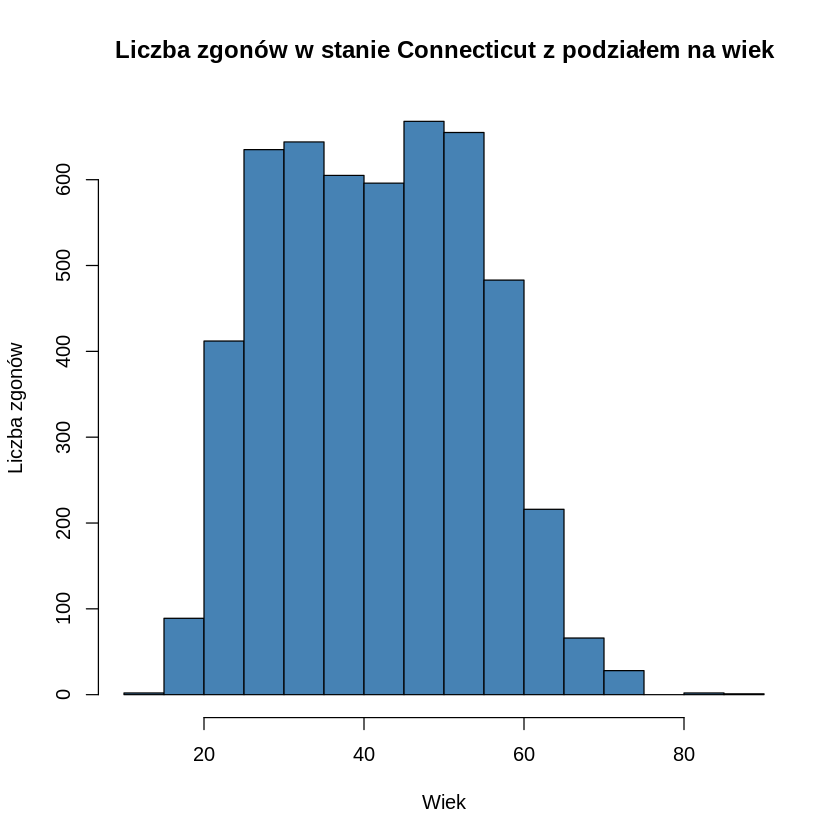

In [5]:
hist(
  data$Age,
  main = "Liczba zgon√≥w w stanie Connecticut z podzia≈Çem na wiek",
  xlab = "Wiek",
  ylab = "Liczba zgon√≥w",
  col = "steelblue"
)

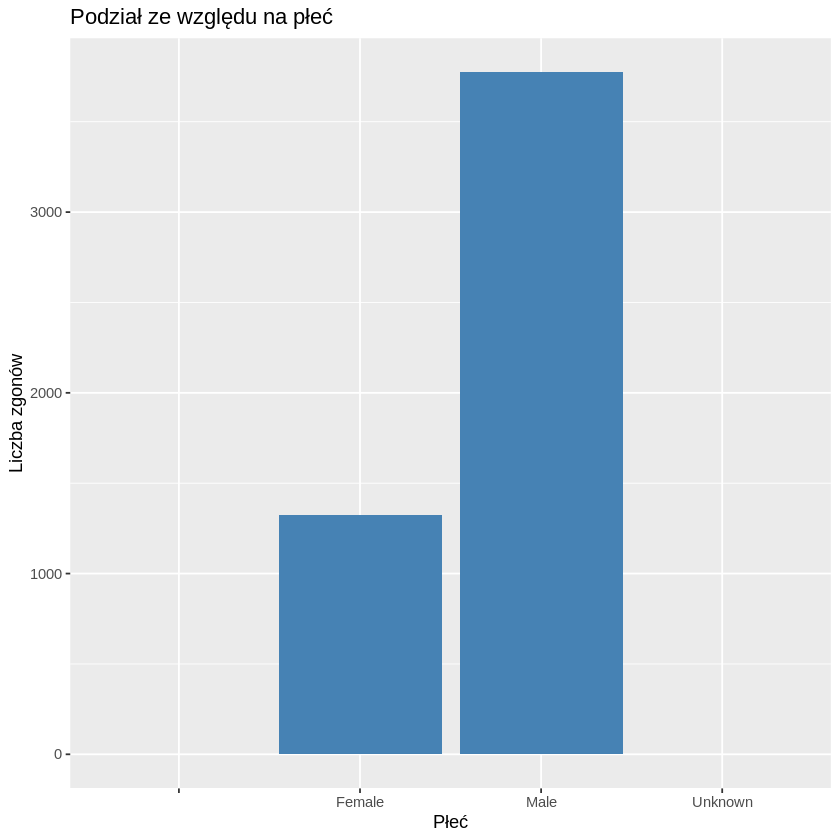

In [6]:
sex_count <- data.frame(data$Sex)

ggplot(sex_count, aes(x=data$Sex)) + geom_bar(fill = "steelblue") + labs(title = "Podzia≈Ç ze wzglƒôdu na p≈Çeƒá",
               x = "P≈Çeƒá",
               y = "Liczba zgon√≥w")

Jak widaƒá na powy≈ºszym wykresie mƒô≈ºczy≈∫ni sƒÖ g≈Ç√≥wnymi osobami w bazie danych i przewy≈ºajƒÖ liczbƒô zgon√≥w kobiet prawie trzykrotnie.
****

In [7]:
race_count <- table(data$Race)
race_count
count <- length(data$Race)
white_percent = race_count['White']/count * 100
latin_percent = (race_count['Hispanic, White'] + race_count['Hispanic, Black']) /count * 100
black_percent = race_count['Black']/count * 100
print(paste("Liczba rekord√≥w: ", count))
print(paste("% bia≈Çych: ", race_count['White']/count * 100))
print(paste("% latynos√≥w", (race_count['Hispanic, White'] + race_count['Hispanic, Black']) /count * 100))
print(paste("% czarnych: ", race_count['Black']/count * 100))



                                 Asian Indian           Asian, Other 
                    10                     14                     18 
                 Black                Chinese               Hawaiian 
                   433                      2                      1 
       Hispanic, Black        Hispanic, White Native American, Other 
                    24                    561                      1 
                 Other                Unknown                  White 
                    11                     23                   4004 

[1] "Liczba rekord√≥w:  5102"
[1] "% bia≈Çych:  78.4790278322227"
[1] "% latynos√≥w 11.4660917287338"
[1] "% czarnych:  8.48686789494316"


W≈õr√≥d zbioru danych mo≈ºna wyr√≥≈∫niƒá 3 g≈Ç√≥wne rasy sƒÖ to biali, czarni oraz latynosi. ObliczajƒÖc udzia≈Ç procentowy w liczbie zgon√≥w, chcia≈Çem sprawdziƒá jak to siƒô ma do danych populacji, kt√≥re znalaz≈Çem pod linkiem: https://www.populationu.com/us/connecticut-population#race. Mo≈ºna zauwa≈ºyƒá, ≈ºe udzia≈Çy procentowe poszczeg√≥lnych ras w populacji stanu, sƒÖ zbli≈ºone do udzia≈Çu procentowego poszczeg√≥lnych ras w badanym zbiorze.

**Statystyki opisowe**
****
Wiek

In [ ]:
print(paste("≈örednia wieku: ", mean(data$Age)))
print(paste("Mediana wieku: ", median(data$Age)))
print(paste("Wariancja: ", var(data$Age)))
print(paste("Odchylenie standardowe: ", sd(data$Age)))

[1] "≈örednia wieku:  41.9649157193258"
[1] "Mediana wieku:  42"
[1] "Wariancja:  152.192652404187"
[1] "Odchylenie standardowe:  12.3366386185292"


****
# Testy statystyczne


***
## test $\chi^2$ 
***

Zastosowa≈Çem test $\chi^2$ w celu sprawdzenia czy ≈õmiertelno≈õƒá poszczeg√≥lnych ras jest zgodna z ich rozk≈Çadem w populacji(stanie Conecticut), dane dotyczƒÖce populacji zosta≈Çy pobrane z: https://www.populationu.com/us/connecticut-population#race. W te≈õcie por√≥wna≈Çem cztery najliczniejsze rasy: biali, czarni, latynosi, azjaci.
Rozk≈Çad ludno≈õci w stanie Conecticut podano w tabeli *typical*, natomiast zaobserwowanƒÖ liczbƒô zgon√≥w z podzia≈Çem na rasy w tabeli observed

In [ ]:
black_observed = as.numeric(race_count['Black'])
latin_observed = as.numeric(race_count['Hispanic, White']) + as.numeric(race_count['Hispanic, Black'])
white_observed = as.numeric(race_count['White'])
asian_observed = as.numeric(race_count['Asian Indian'])  + as.numeric(race_count['Chinese'])

categories = c("Asian", "Black", "Latin", "White")
typical = c(156450, 376240, 551916,	2757064)
observed = c(asian_observed, black_observed, latin_observed, white_observed)

Postawiona hipoteza zerowa:

**h0: rozk≈Çad ≈õmierci wed≈Çug rasy jest zgodny z rozk≈Çadem rasy w stanie**

Postawiona hipoteza alternatywna:

**h1: rozk≈Çady nie sƒÖ zgodne**

Przyjƒôty poziom istotno≈õci $\alpha = 0.05$.

In [ ]:
alpha = 0.05

Liczba stopni swobody *df*:

In [ ]:
df = length(typical) - 1
df

[1] 3

Tabela wartoci oczekiwanych:

In [ ]:
sum_observed <- sum(observed)
sum_typical <- sum(typical)

prob_typical <- typical/sum_typical

expected <- prob_typical * sum_observed
expected
observed

[1]  205.1699  493.4045  723.7875 3615.6381

[1]   16  433  585 4004

Statystyka testowa:

In [ ]:
chisq.test(observed, p=expected/sum(expected))


	Chi-squared test for given probabilities

data:  observed
X-squared = 250.14, df = 3, p-value < 2.2e-16


Warto≈õƒá krytyczna

In [ ]:
crit = qchisq(1-alpha, df)
crit

[1] 7.814728

Wnioski:

Hipoteza zerowa h0 zostaje odrzucona na rzecz h1. Rozk≈Çady ≈õmierci z powodu przedawkowania narkotyk√≥w wed≈Çug rasy a rozk≈Çadem rasy w stanie Coecticut nie sƒÖ zgodne.

***
## Test **t-Studenta**
***

Przeprowadzi≈Çem test ***t-Studenta*** w celu odpowiedzenia na pytanie:

*Czy istnieje istotna r√≥≈ºnica w ≈õrednim wieku zmar≈Çych mƒô≈ºczyzn i kobiet w zwiƒÖzku z przedawkowaniem narkotyk√≥w?*


In [9]:
data_male <- data[data$Sex == "Male", "Age"]
data_female <- data[data$Sex == "Female", "Age"]

Na poczƒÖtku zosta≈Çy sprawdzone za≈Ço≈ºenia testu ***t-Studenta***, w tym celu uzyto testu normalno≈õci ***Shapiro-Wilka***

In [ ]:
shapiro.test(data_male)
shapiro.test(data_female)


	Shapiro-Wilk normality test

data:  data_male
W = 0.97903, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  data_female
W = 0.97637, p-value = 6.416e-14


P warto≈õci sƒÖ mniejsze od 0.05 co oznacza, ≈ºe dane znaczƒÖco nie odbiegajƒÖ od rozk≈Çadu normalnego. Za≈Ço≈ºenia testu t-Studenta zosta≈Çy spe≈Çnione

Por√≥wnanie wariancji

In [ ]:
var.test(data_male, data_female) # Test F


	F test to compare two variances

data:  data_male and data_female
F = 0.94451, num df = 3772, denom df = 1324, p-value = 0.2018
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8636298 1.0310034
sample estimates:
ratio of variances 
         0.9445144 


In [ ]:
t_test_result <- t.test(data_male, data_female)
t_test_result


	Welch Two Sample t-test

data:  data_male and data_female
t = -1.9652, df = 2260.7, p-value = 0.04951
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.567454363 -0.001667651
sample estimates:
mean of x mean of y 
 41.75431  42.53887 


In [ ]:
t_test_result$p.value
t_test_result$estimate

[1] 0.0495144

mean of x mean of y 
 41.75431  42.53887

****
## Test dw√≥ch populacji
****

BazujƒÖc na zbiorze danych chia≈Çem odpowiedzieƒá na pytanie:

Czy istnieje istotna r√≥≈ºnica w ≈õredniej wieku u kobiet i mƒô≈ºczyzn zmar≈Çych z powodu przedawkowania narkotyk√≥w?

Do ustalenia odpowiedzi na to pytanie skorzystam z testu dla niesparowanej du≈ºej pr√≥by. Jednak przed tym trzeba zweryfikowaƒá czy zmienna reprezentujƒÖca kobiety oraz zmienna reprezentujƒÖca mƒô≈ºczyzn mo≈ºe byƒá przybli≈ºona rozk≈Çadem normalnym. W celu sprawdzenia tego skorzystam z testu Shapiro-Wilka z poziomem istotno≈õci 0.05.

Hipotezy g≈Ç√≥wnego testu:

H_0 = Nie istnieje r√≥≈∫nica w ≈õredniej wieku u kobiet i mƒô≈ºczyzn zmar≈Çych z powodu przedawkowania narkotyk√≥w.

H_1 = Istnieje r√≥≈ºnica
Poziom istono≈õci 0.05.

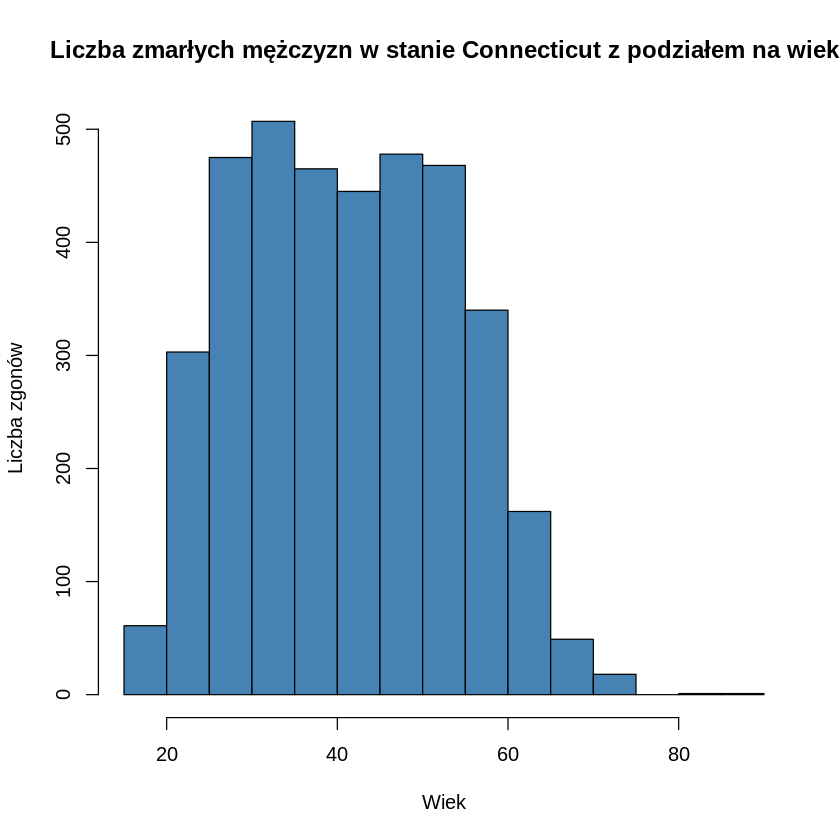

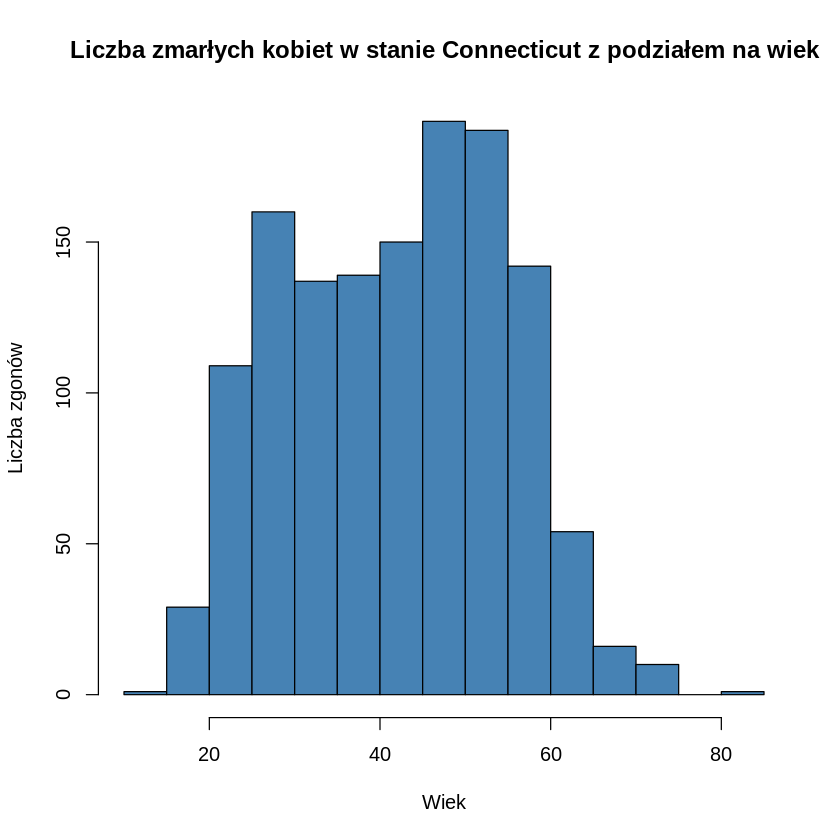

In [18]:
data_male <- data[data$Sex == "Male", "Age"]
data_female <- data[data$Sex == "Female", "Age"]
hist(data_male, 
  main = "Liczba zmar≈Çych mƒô≈ºczyzn w stanie Connecticut z podzia≈Çem na wiek",
  xlab = "Wiek",
  ylab = "Liczba zgon√≥w",
  col = "steelblue")
hist(data_female,
  main = "Liczba zmar≈Çych kobiet w stanie Connecticut z podzia≈Çem na wiek",
  xlab = "Wiek",
  ylab = "Liczba zgon√≥w",
  col = "steelblue"
  )

**Test Shapiro-Wilka**

W te≈õcie Shapiro-Wilka hipoteza zerowa brzmi: Zmienna mo≈ºe mieƒá rozk≈Çad normalny, a alternatywna ≈ºe zmienna nie mo≈ºe mieƒá rozk≈Çadu normalnego.

In [29]:
shapiro.test(data_male)
shapiro.test(data_female)


	Shapiro-Wilk normality test

data:  data_male
W = 0.97903, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  data_female
W = 0.97637, p-value = 6.416e-14


Niestety w obu przypadkach muszƒô udrzuciƒá hipotezƒô zerowƒÖ i przyjƒÖƒá hipotezƒô alternatywnƒÖ. Przez to nie mogƒô kontynuowaƒá testu niesparowanego. I muszƒô zmieniƒá test na Manna-Whitneya, kt√≥ry w R znajduje siƒô pod funckjƒÖ wilcoxon().

In [34]:
wilcox.test(data_male, data_female, paired = FALSE, correct = FALSE)


	Wilcoxon rank sum test

data:  data_male and data_female
W = 2401110, p-value = 0.03253
alternative hypothesis: true location shift is not equal to 0


Na podstawie powy≈ºszego testu odrzucam hipotezƒô zerowƒÖ na rzecz hipotezy alternatywnej, czyli "Istnieje istotna statystycznie r√≥≈∫nica ≈õredniej wieku u kobiet i mƒô≈ºczyzn zmar≈Çych z powodu przedawkowania narkotyk√≥w."

****
## Test Z
****
W tym te≈õcie chcia≈Çbym sprawdziƒá czy istnieje statystcznie istotna r√≥≈∫nica miƒôdzy ≈õredniƒÖ wieku ofiar z ca≈Çego okresu a poszczeg√≥lnymi latami z zbioru danych.

Test jest dwustronny z poziomem istotno≈õci Œ± = 0.05.
Hipotezy:

H_0: ùêó_year = Œº

H_1: ùêó_year != Œº 

In [54]:
data$Date <- as.Date(data$Date, format = "%m/%d/%Y %I:%M:%S %p")
data$Date <- format(data$Date, "%Y")

In [92]:
z <- function(year_data) {
  z <- ((mean(year_data) - mean(data$Age))/sd(data$Age))*sqrt(length(year_data))
  z <- abs(z)
  return(z)
}

reject <- function(value) {
  decision = FALSE
  if (value > qnorm(1 - 0.05/2)) {
    decision = TRUE
  }
  return(decision)
}


mean_all_period <- mean(data$Age)
data_2012 <- data[data$Date == '2012', "Age"]
data_2013 <- data[data$Date == '2013', "Age"]
data_2014 <- data[data$Date == '2014', "Age"]
data_2015 <- data[data$Date == '2015', "Age"]
data_2016 <- data[data$Date == '2016', "Age"]
data_2017 <- data[data$Date == '2017', "Age"]
data_2018 <- data[data$Date == '2018', "Age"]

data_2012 <- data_2012[complete.cases(data_2012)]
data_2013 <- data_2013[complete.cases(data_2013)]
data_2014 <- data_2014[complete.cases(data_2014)]
data_2015 <- data_2015[complete.cases(data_2015)]
data_2016 <- data_2016[complete.cases(data_2016)]
data_2017 <- data_2017[complete.cases(data_2017)]
data_2018 <- data_2018[complete.cases(data_2018)]

years <- c(2012, 2013, 2014, 2015, 2016, 2017, 2018)
data_list <- list(data_2012, data_2013, data_2014, data_2015, data_2016, data_2017, data_2018)
frame <- data.frame(Year = years, MeanAge = sapply(data_list, mean))
frame <- cbind(frame, VarianceAge = sapply(data_list, var))
frame <- cbind(frame, SdAge = sapply(data_list, sd))
frame <- cbind(frame, Zvalue = sapply(data_list, z))
frame <- cbind(frame, RejectH0 = sapply(frame$Zvalue, reject))
frame

Year MeanAge  VarianceAge SdAge    Zvalue    RejectH0
1 2012 40.77183 157.3687    12.54467 1.8221689 FALSE   
2 2013 41.38776 149.7757    12.23829 1.0356139 FALSE   
3 2014 41.57810 143.4494    11.97704 0.7400112 FALSE   
4 2015 42.30303 163.9301    12.80352 0.7384743 FALSE   
5 2016 42.08288 147.0455    12.12623 0.2895573 FALSE   
6 2017 41.74085 150.7650    12.27864 0.5851693 FALSE   
7 2018 42.76523 153.3873    12.38496 2.0698335  TRUE

[1] 1.959964

Na podstawie przeprowadzonego testu, jedynie w roku 2018 warto≈õƒá ≈õrednia wieku r√≥≈ºni≈Ça siƒô statystycznie od ≈õredniej wieku w ca≈Çej pr√≥bie.
****